# Basic import

In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

# Load data and copy dataframe

In [493]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
initial_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_573490.csv')
df = initial_df.copy()
df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
31,Brunei Darussalam,BRN,"Population, total",SP.POP.TOTL,8.534600e+04,8.956100e+04,9.383700e+04,9.827700e+04,1.029040e+05,1.076860e+05,1.125970e+05,1.176280e+05,1.227640e+05,1.280120e+05,1.333430e+05,1.386660e+05,1.438860e+05,1.490650e+05,1.543140e+05,1.596530e+05,1.650640e+05,1.705600e+05,1.761760e+05,1.819510e+05,1.879210e+05,1.940990e+05,2.006300e+05,2.075230e+05,2.146820e+05,2.221190e+05,2.298150e+05,2.377120e+05,2.457290e+05,2.538210e+05,2.619280e+05,2.698600e+05,2.774160e+05,2.847130e+05,2.919350e+05,2.990970e+05,3.061960e+05,3.132150e+05,3.201520e+05,3.270450e+05,3.339260e+05,3.407480e+05,3.474630e+05,3.540450e+05,3.604610e+05,3.667170e+05,3.728080e+05,3.787480e+05,3.845680e+05,3.903110e+05,3.960530e+05,4.015060e+05,4.066340e+05,4.117020e+05,4.166560e+05,4.214370e+05,4.259940e+05,4.302760e+05,4.342740e+05,4.380480e+05,4.417250e+05,4.453730e+05,4.490020e+05,NaN,NaN
58,Denmark,DNK,"Population, total",SP.POP.TOTL,4.579603e+06,4.611687e+06,4.647727e+06,4.684483e+06,4.722072e+06,4.759012e+06,4.797381e+06,4.835354e+06,4.864883e+06,4.891860e+06,4.928757e+06,4.963126e+06,4.991596e+06,5.021861e+06,5.045297e+06,5.059862e+06,5.072596e+06,5.088419e+06,5.104248e+06,5.116801e+06,5.123027e+06,5.121572e+06,5.117810e+06,5.114297e+06,5.111619e+06,5.113691e+06,5.120534e+06,5.127024e+06,5.129516e+06,5.132594e+06,5.140939e+06,5.154298e+06,5.171370e+06,5.188628e+06,5.206180e+06,5.233373e+06,5.263074e+06,5.284991e+06,5.304219e+06,5.321799e+06,5.339616e+06,5.358783e+06,5.375931e+06,5.390574e+06,5.404523e+06,5.419432e+06,5.437272e+06,5.461438e+06,5.493621e+06,5.523095e+06,5.547683e+06,5.570572e+06,5.591572e+06,5.614932e+06,5.643475e+06,5.683483e+06,5.728010e+06,5.764980e+06,5.793636e+06,5.814422e+06,5.831404e+06,5.856733e+06,5.903037e+06,NaN,NaN
46,Comoros,COM,"Population, total",SP.POP.TOTL,1.948520e+05,1.986170e+05,2.025270e+05,2.065460e+05,2.106650e+05,2.149390e+05,2.193690e+05,2.243210e+05,2.299710e+05,2.360020e+05,2.423510e+05,2.490660e+05,2.561870e+05,2.637280e+05,2.717190e+05,2.800360e+05,2.888100e+05,2.981520e+05,3.079380e+05,3.181230e+05,3.283280e+05,3.379860e+05,3.470530e+05,3.561370e+05,3.656640e+05,3.756500e+05,3.860680e+05,3.968870e+05,4.080700e+05,4.195840e+05,4.311190e+05,4.422770e+05,4.529900e+05,4.633180e+05,4.734780e+05,4.837600e+05,4.942880e+05,5.050330e+05,5.159590e+05,5.264430e+05,5.367580e+05,5.477410e+05,5.590470e+05,5.701300e+05,5.811540e+05,5.926830e+05,6.046580e+05,6.168990e+05,6.294700e+05,6.424930e+05,6.560240e+05,6.700710e+05,6.845530e+05,6.993930e+05,7.146120e+05,7.302160e+05,7.462320e+05,7.616640e+05,7.763130e+05,7.909860e+05,8.061660e+05,8.216250e+05,8.367740e+05,NaN,NaN
207,Senegal,SEN,"Population, total",SP.POP.TOTL,3.273177e+06,3.367082e+06,3.463524e+06,3.562469e+06,3.664599e+06,3.770874e+06,3.881994e+06,3.997869e+06,4.117659e+06,4.240859e+06,4.367744e+06,4.498616e+06,4.633452e+06,4.772039e+06,4.911421e+06,5.047922e+06,5.181195e+06,5.308297e+06,5.433225e+06,5.564474e+06,5.703869e+06,5.852029e+06,6.008392e+06,6.171874e+06,6.341801e+06,6.520705e+06,6.710885e+06,6.909837e+06,7.113636e+06,7.321832e+06,7.536001e+06,7.754289e+06,7.974514e+06,8.196551e+06,8.416997e+06,8.632681e+06,8.843423e+06,9.051539e+06,9.261526e+06,9.478564e+06,9.704287e+06,9.938027e+06,1.018095e+07,1.043450e+07,1.069869e+07,1.097406e+07,1.126339e+07,1.156387e+07,1.187293e+07,1.219503e+07,1.253012e+07,1.287588e+07,1.323183e+07,1.359557e+07,1.397031e+07,1.435618e+07,1.475136e+07,1.515779e+07,1.557491e+07,1.600078e+07,1.643612e+07,1.687672e+07,1.731645e+07,NaN,NaN
142,Late-demographic dividend,LTE,"Population, total",SP.POP.TOTL,1.095549e+09,1.097729e+09,1.112143e+09

In [494]:
df.shape

(266, 69)

# Remove unimportant columns

In [495]:
df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68', '2023', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

# Check null values

In [496]:
df[df.isnull().any(axis=1)]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
110,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978248.0,2068845.0,2163591.0,2262676.0,2366298.0,2474666.0,2587997.0,2706518.0,2776568.0,2848431.0,2922153.0,2997784.0,3075373.0,3154969.0,3236626.0,3320396.0,3406334.0,3494496.0,3591977.0,3689099.0,3786161.0,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0,5043612.0


# Remove columns with null values

In [497]:
df.dropna(inplace=True)
df.shape

(264, 64)

# Transform the DataFrame to obtain a structure where years are used as the index and the columns represent different countries

In [498]:
df = df.set_index('Country Name').T
df.index = pd.to_datetime(df.index)
df.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Gibraltar,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Monaco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Northern Mariana Islands,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,Nauru,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960-01-01,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,1904148.0,20085.0,55342.0,10276477.0,7047539.0,3894500.0,2746628.0,9153489.0,2512284.0,4783259.0,50396429.0,7867374.0,160691.0,114500.0,3262539.0,8198000.0,91403.0,44400.0,3707515.0,73092515.0,232550.0,85346.0,221266.0,512865.0,1679728.0,17909356.0,91401764.0,5327827.0,109186.0,8141820.0,667070000.0,3708661.0,5117608.0,1527

In [499]:
countries = {}
for country in df.columns:
    if country == 'Russia':
        continue
    countries[country] = df[country]

# Select several countries with different population change patterns (growth, decline, etc.) to test various predictive models

In [500]:
countries_for_test_list = ['Ukraine', 'Bulgaria', 'Bosnia and Herzegovina', 'Georgia', 'Czechia', 'Germany', 'United States', 'China', 'Japan']
countries_for_test = {country: countries[country] for country in countries_for_test_list}

# Create function for showing population dynamic

In [501]:
def convert_to_millions(x, pos):
    return '%1.2fM' % (x * 1e-6)
    
def show_population_graph(population, country_name):
    x = [str(year) for year in range(1960, 2022+1)]
    y = population.values.tolist()

    plt.figure(figsize=(16, 6))
    plt.plot(
        x, 
        y,
        color='b',
        marker='o',
    )
    plt.xticks(rotation=90)
    plt.title('Population dynamic for ' + country_name + ' (from 1960 to 2022)')
    plt.xlabel('Year')
    plt.ylabel('Population (in millions)')
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(convert_to_millions))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    
    plt.show()

# Show population change graphs of the selected countries

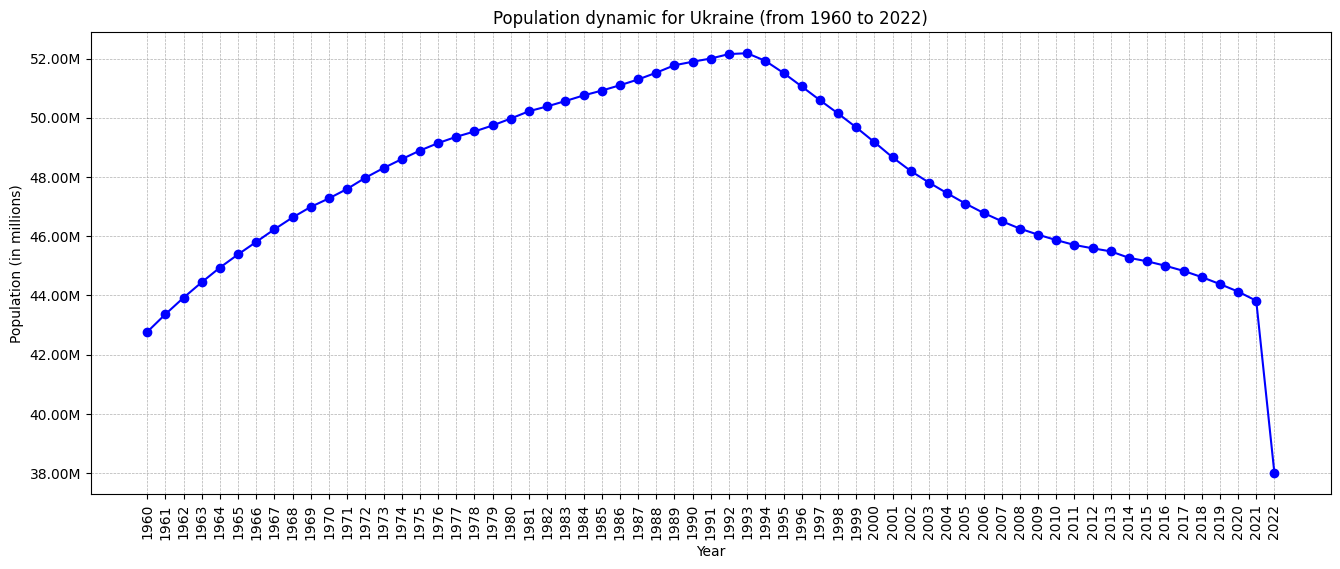

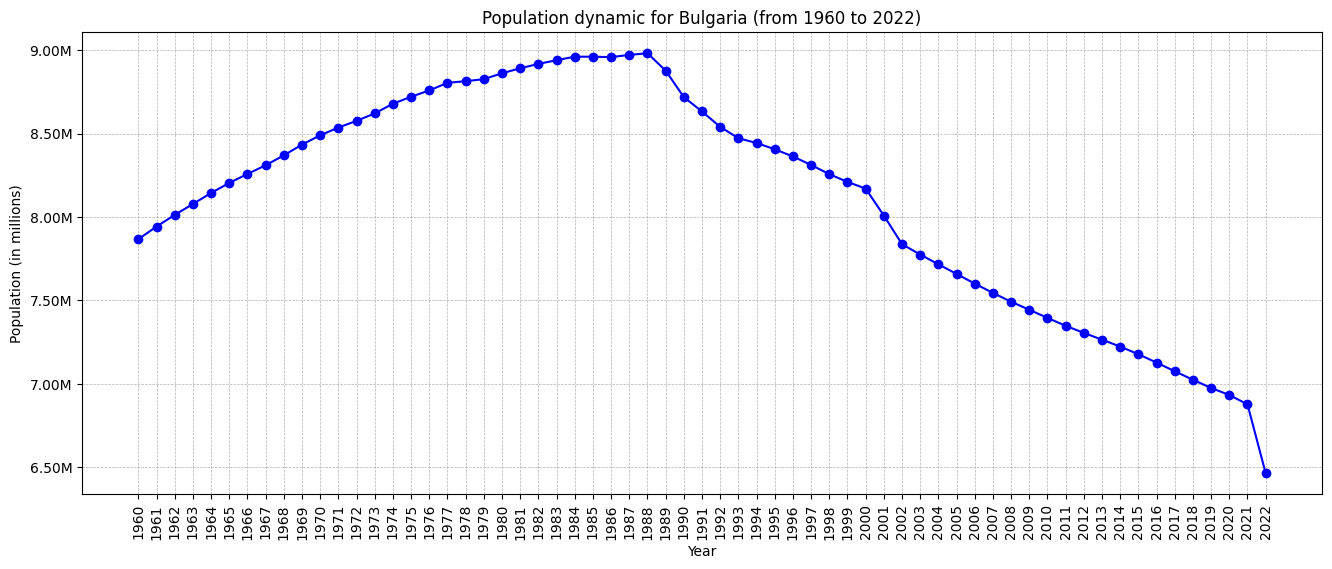

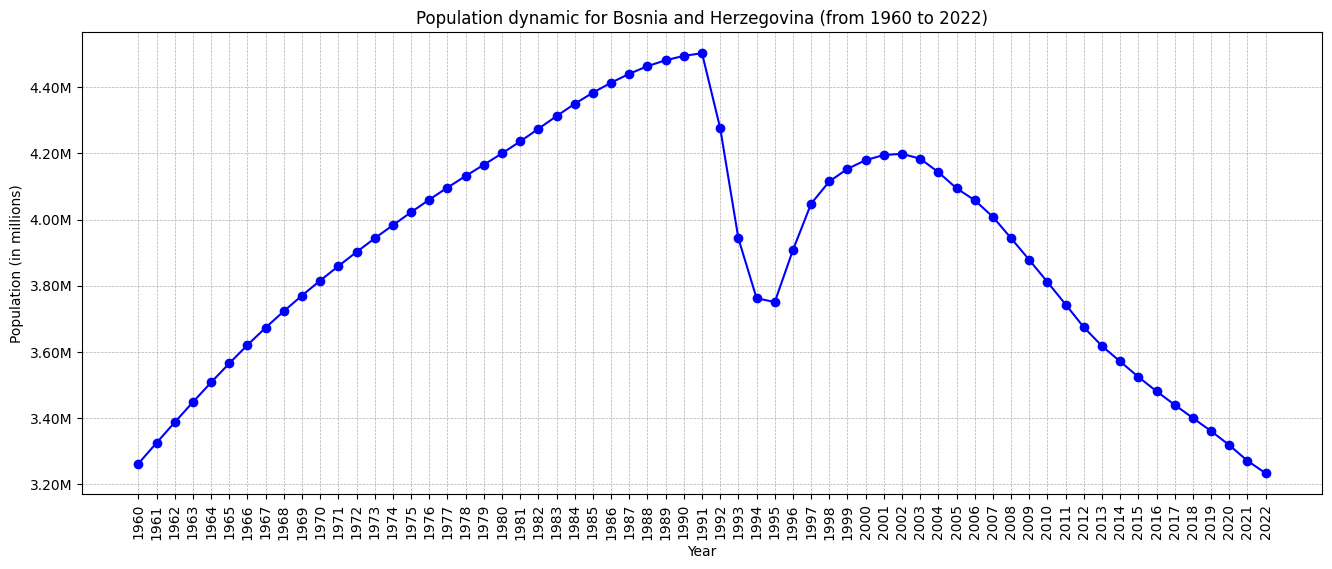

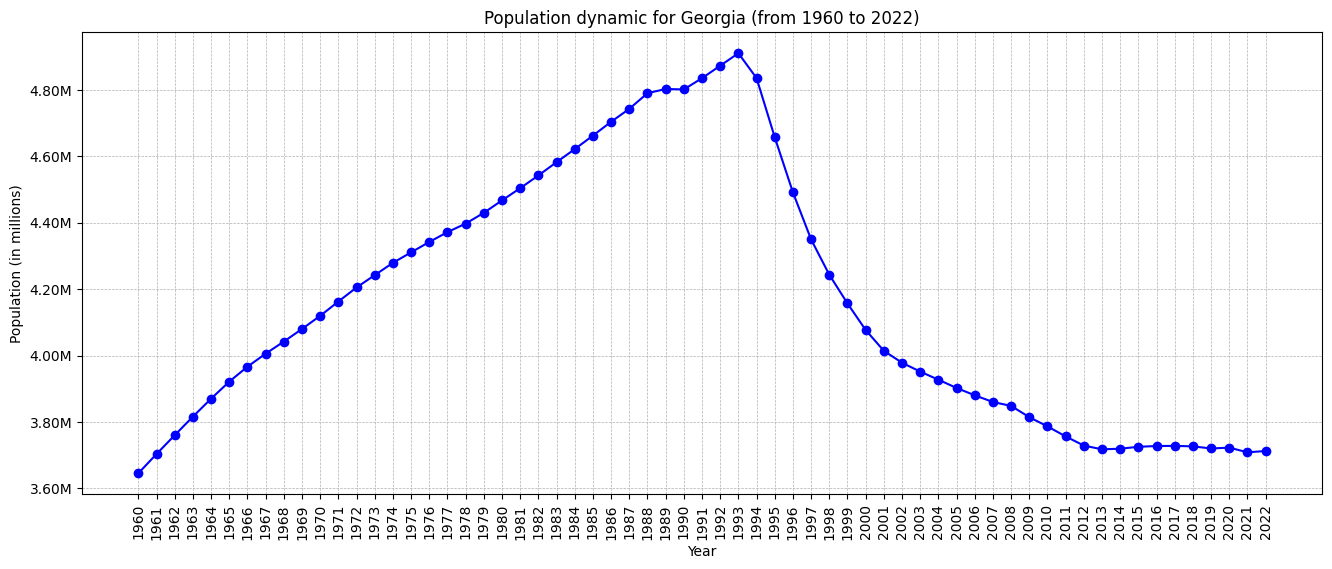

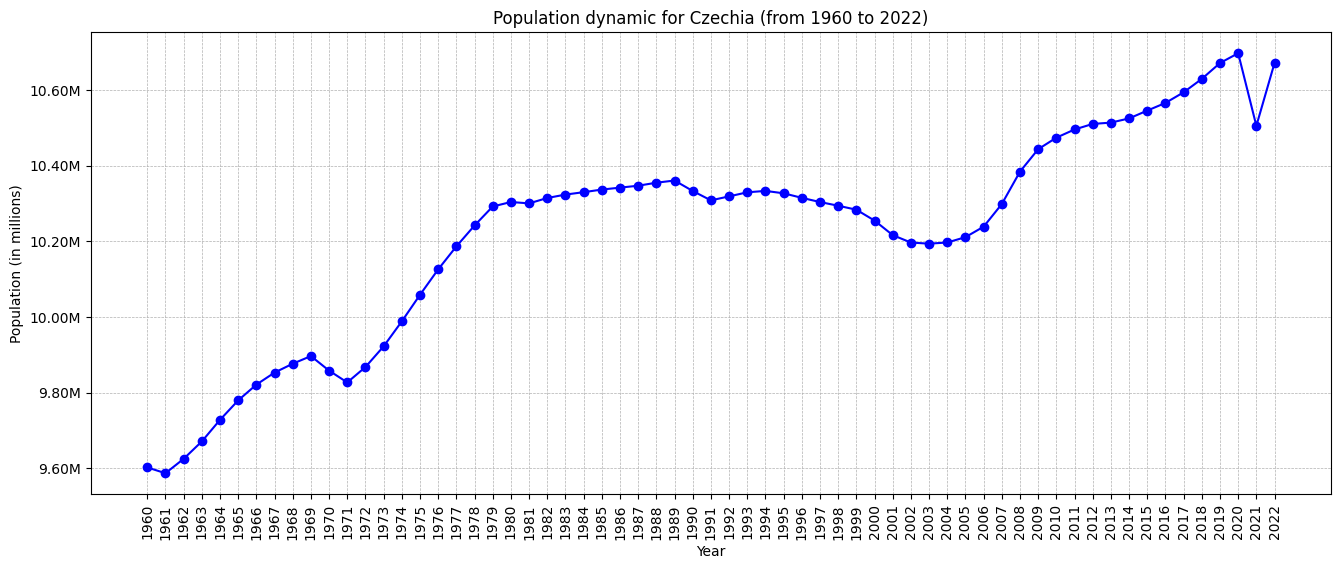

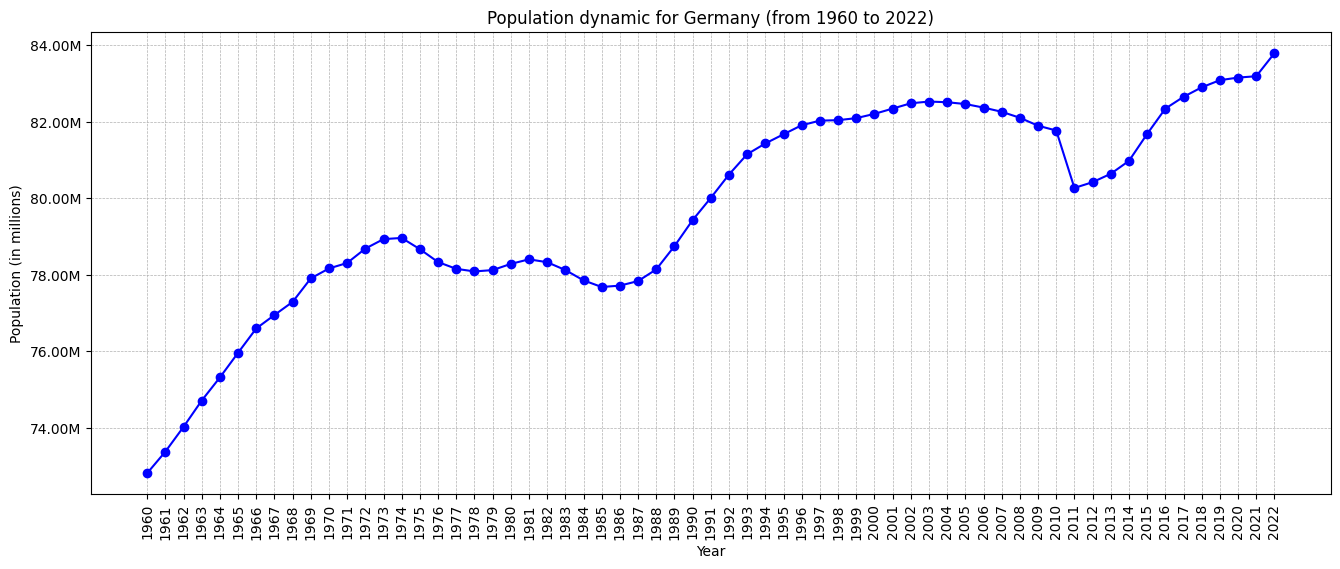

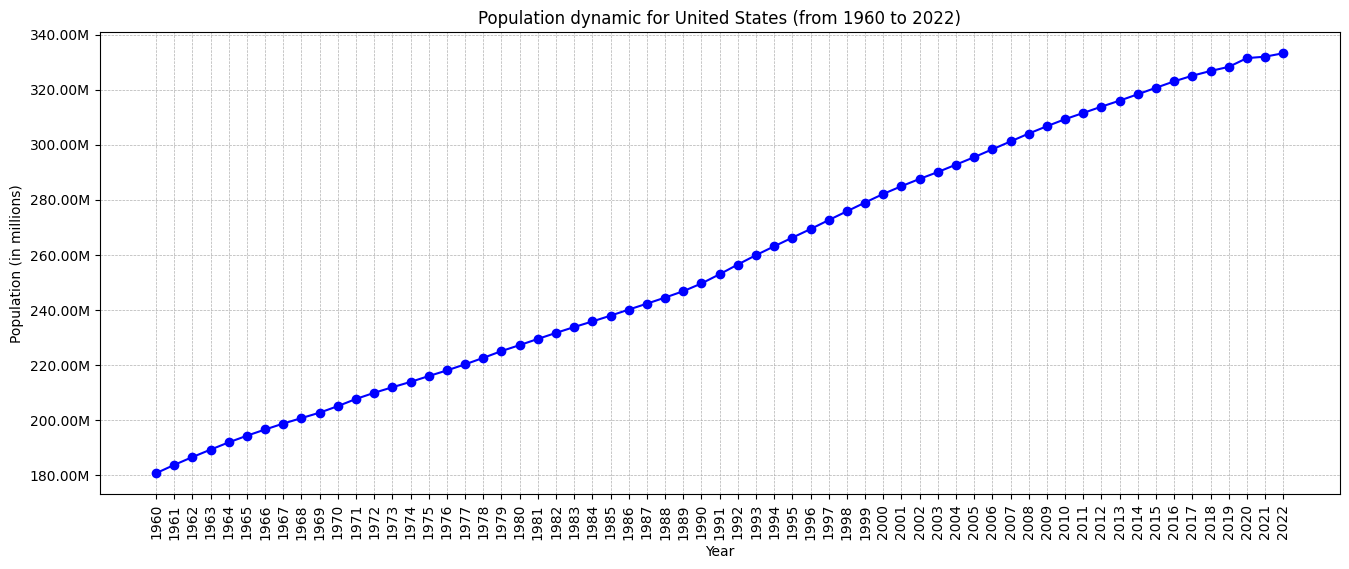

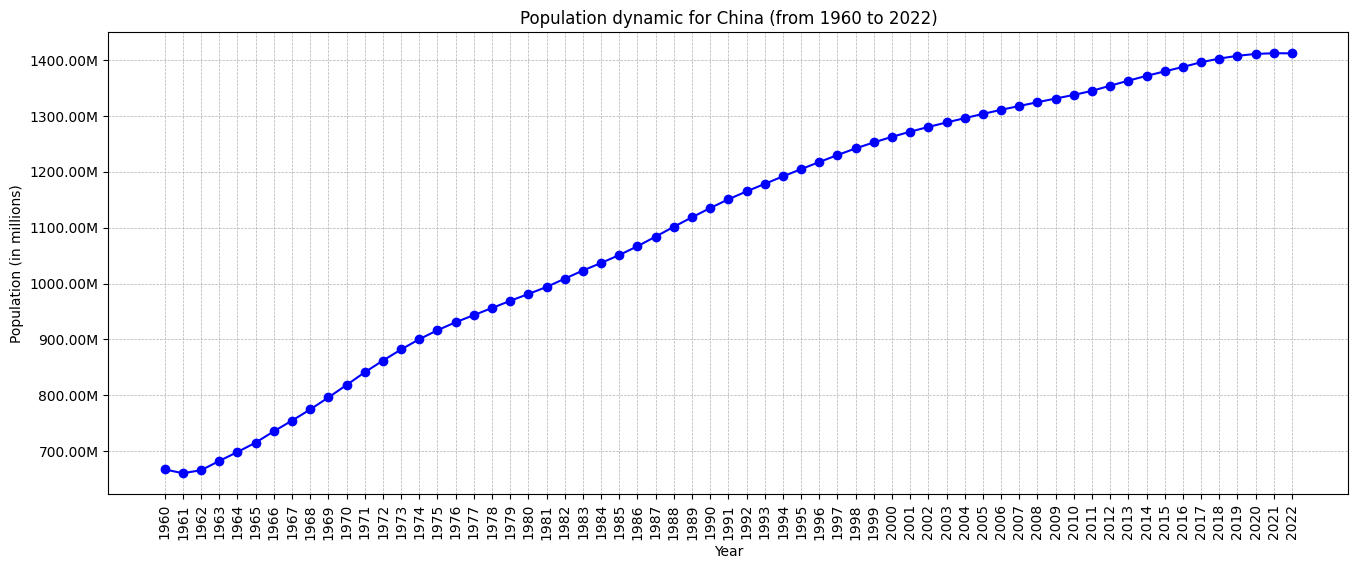

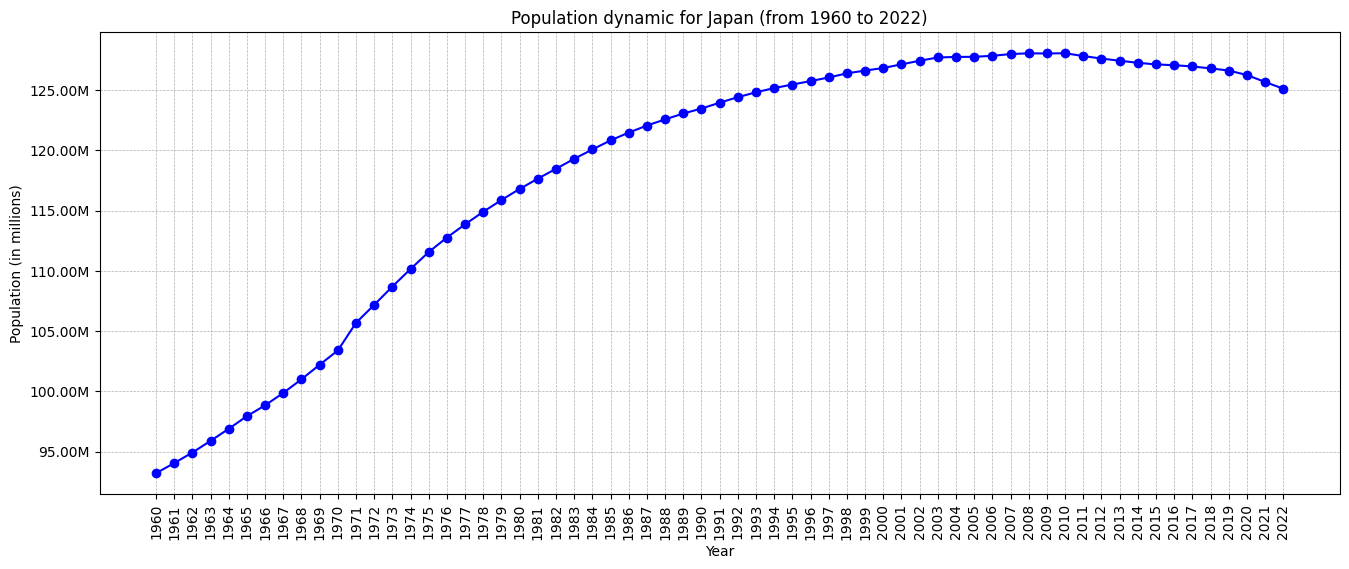

In [502]:
for country_name, country_data in countries_for_test.items():
    show_population_graph(country_data, country_name)

In [503]:
def exp_smoothing(country_data, country_name):
    forecast_years = 10
    
    fit1 = SimpleExpSmoothing(country_data, initialization_method="heuristic").fit(
        smoothing_level=0.2, optimized=False
    )
    fcast1 = fit1.forecast(forecast_years).rename(r"$\alpha=0.2$")
    fit2 = SimpleExpSmoothing(country_data, initialization_method="heuristic").fit(
        smoothing_level=0.6, optimized=False
    )
    fcast2 = fit2.forecast(forecast_years).rename(r"$\alpha=0.6$")
    fit3 = SimpleExpSmoothing(country_data, initialization_method="estimated").fit()
    fcast3 = fit3.forecast(forecast_years).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

    x = [str(year) for year in range(1960, 2022+1)]
    
    plt.figure(figsize=(12, 8))
    plt.plot(country_data, marker="o", color="black")
    plt.plot(fit1.fittedvalues, marker="o", color="blue")
    (line1,) = plt.plot(fcast1, marker="o", color="blue")
    plt.plot(fit2.fittedvalues, marker="o", color="red")
    (line2,) = plt.plot(fcast2, marker="o", color="red")
    plt.plot(fit3.fittedvalues, marker="o", color="green")
    (line3,) = plt.plot(fcast3, marker="o", color="green")
    plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
    plt.title(country_name)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(convert_to_millions))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)

In [504]:
def arima(country_data, country_name):
    arma_mod = ARIMA(country_data, order=(2, 0, 2), trend="n")
    arma_res = arma_mod.fit()
    
    #print(arma_res.summary())

    fig, ax = plt.subplots(figsize=(10, 8))
    fig = plot_predict(arma_res, start="2010-01-01", end="2030-01-01", ax=ax)
    legend = ax.legend(loc="upper left")
    plt.title(country_name)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(convert_to_millions))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    plt.show()

In [505]:
def prophet(country_data, country_name):
    data = country_data.reset_index(drop=False)
    data.rename(columns={'index': 'ds', country_name: 'y'}, inplace=True)
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))
    #plot_plotly(model, forecast)
    #plot_components_plotly(model, forecast)

In [506]:
for country_name, country_data in countries_for_test.items():
    #exp_smoothing(country_data, country_name)
    print(country_name)
    print(country_data)
    #arima(country_data, country_name)
    prophet(country_data, country_name)

22:29:31 - cmdstanpy - INFO - Chain [1] start processing
22:29:32 - cmdstanpy - INFO - Chain [1] done processing


Ukraine
1960-01-01    42767251.0
1961-01-01    43365219.0
1962-01-01    43924755.0
1963-01-01    44445903.0
1964-01-01    44941406.0
                 ...    
2018-01-01    44622518.0
2019-01-01    44386203.0
2020-01-01    44132049.0
2021-01-01    43822901.0
2022-01-01    38000000.0
Name: Ukraine, Length: 63, dtype: float64
            ds          yhat    yhat_lower    yhat_upper
378 2022-11-13 -1.092309e+07 -1.186928e+07 -1.001030e+07
379 2022-11-14 -2.516352e+07 -2.604613e+07 -2.425853e+07
380 2022-11-15 -3.952577e+07 -4.047557e+07 -3.868458e+07
381 2022-11-16 -5.359697e+07 -5.439286e+07 -5.270516e+07
382 2022-11-17 -6.696087e+07 -6.781246e+07 -6.609590e+07
383 2022-11-18 -7.920932e+07 -8.010736e+07 -7.830559e+07
384 2022-11-19 -8.995357e+07 -9.085000e+07 -8.902044e+07
385 2022-11-20 -9.883525e+07 -9.973972e+07 -9.782908e+07
386 2022-11-21 -1.055366e+08 -1.064319e+08 -1.046957e+08
387 2022-11-22 -1.097900e+08 -1.106714e+08 -1.089417e+08
388 2022-11-23 -1.113854e+08 -1.123126e+08 -1.10

NameError: name 'go' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller

for country in countries_for_test:
    adf_test = adfuller(df[country])
    #print('ADF Statistic (' + country + '): ' + str(adf_test[0]))
    #print('p-value: ' + str(adf_test[1]))